In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_table('datasets/SMSSpamCollection.txt',sep='\t',header=None,names=['label','body'])
df.head()

,label,body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   body    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [54]:
df.isna().sum()

label    0
body     0
dtype: int64

In [55]:
lebel = LabelEncoder()
df['label'] = lebel.fit_transform(df['label'])
df.sample(5)

,label,body
5466,1,http//tms. widelive.com/index. wml?id=820554ad...
2134,0,Spoke with uncle john today. He strongly feels...
4749,0,The beauty of life is in next second.. which h...
1223,0,Teach me apps da. When you come to college.
2530,0,Can you just come in for a sec? There's somebo...


In [56]:
x_data = df['body']

In [57]:
y_data = df['label']

In [58]:
x_data.sample(3)

5144                 I'm in office now da:)where are you?
5126    To the wonderful Okors, have a great month. We...
4147    I cant wait for cornwall. Hope tonight isnt ...
Name: body, dtype: object

In [59]:
counter = CountVectorizer()
bag_of_wards = counter.fit_transform(x_data)
bag_of_wards

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [60]:
print(bag_of_wards.shape)

(5572, 8713)


In [61]:
y_data.shape

(5572,)

In [62]:
x_train,x_test,y_train,y_test = train_test_split(bag_of_wards,y_data,test_size=0.3,random_state=42)

`LogisticRegression`

In [63]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [64]:
lg_predict = lg.predict(x_test)

In [65]:
print(classification_report(lg_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1467
           1       0.90      0.99      0.94       205

    accuracy                           0.99      1672
   macro avg       0.95      0.99      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [66]:
confusion_matrix(lg_predict,y_test)

array([[1445,   22],
       [   3,  202]], dtype=int64)

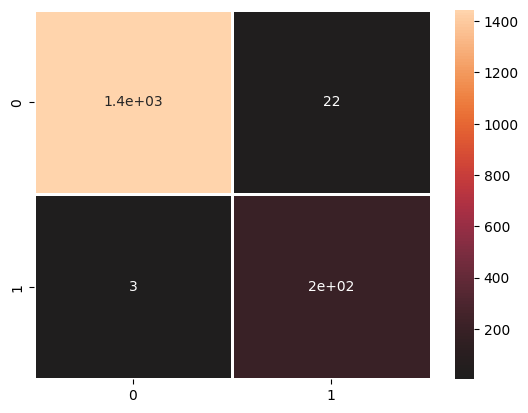

In [67]:
sns.heatmap(confusion_matrix(lg_predict,y_test),annot=True,linewidths=2,center=1)
plt.show()

In [68]:
result = cross_val_score(lg,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(result)
print(result.std())
print(result.mean())

[-0.0238806  -0.02686567 -0.02095808 -0.03592814 -0.02694611]
0.00501861753217706
-0.026915720797211544


In [69]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
dt_predict = dt.predict(x_test)

In [71]:
print(classification_report(dt_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1457
           1       0.86      0.90      0.88       215

    accuracy                           0.97      1672
   macro avg       0.92      0.94      0.93      1672
weighted avg       0.97      0.97      0.97      1672



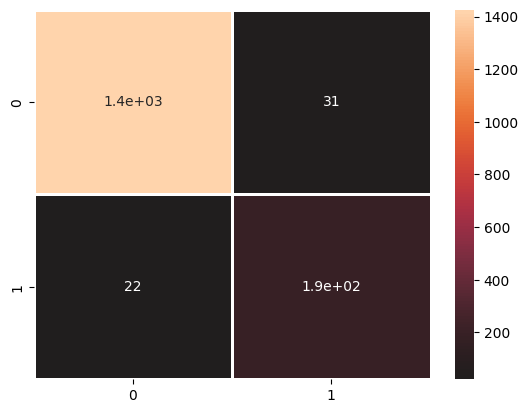

In [72]:
sns.heatmap(confusion_matrix(dt_predict,y_test),annot=True,linewidths=2,center=4)
plt.show()

In [73]:
result = cross_val_score(dt,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(result)
print(result.std())
print(result.mean())

[-0.05671642 -0.03880597 -0.04191617 -0.03592814 -0.04790419]
0.007390563321649532
-0.04425417821074269
